# Processs

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk
import matplotlib


class Process:
    arrival = 0
    burst = 0
    waiting = 0
    lastRunTime = 0
    priority = 0
    remainingTime = 0
    ID = 0
    finished = False
    started = False
    inQueue = False
    
    def __init__(self,arrival,burst,priority,ID):
        self.arrival = arrival
        self.burst = burst
        self.priority = priority
        self.remainingTime = burst
        self.ID = ID
        self.inQueue = False
        self.lastRunTime = 0
        
    def getTAT(self):
        return self.burst+self.waiting
    def getWTAT(self):
        return (self.burst+self.waiting)/self.burst
    def start(self,currentTime):
        if(currentTime >= self.arrival):
            self.started = True
            return True
        else:
            return False
    def run(self,n):
        self.remainingTime -= n
        self.waiting += (n - self.lastRunTime)
        self.lastRunTime = n
        if (self.remainingTime <= 0):
            self.finished = True
            self.remainingTime = 0
    def wait(self,n):
        self.waitingTime += n
    def reset(self):
        self.waitingTime = 0
        self.remainingTime = self.burst
        self.finished = False
        self.started = False
        self.inQueue = False
        self.lastRunTime = 0
    def Print(self):
        print(self.ID,self.arrival,self.burst,self.remainingTime,self.priority)

# Generate input to File

In [2]:
def generateInput(inputfile,outputfile):
    inputs = np.array([])

    with open(inputfile, "r") as file:
        for line in file:
            splitted = line.split( )
            inputs = np.append(inputs,splitted)

    n = int(inputs[0])

    muArrival , sigmaArrival = float(inputs[1]), float(inputs[2])
    muBurst , sigmaBurst = float(inputs[3]), float(inputs[4])
    lamda = float(inputs[5])

    Arrivals = np.random.normal(muArrival,sigmaArrival ,n)
    Burst = np.random.normal(muBurst,sigmaBurst ,n)
    Priority = np.random.poisson(lamda,n)
    Waiting = np.zeros(Arrivals.shape)


    fh = open(outputfile,"w")

    #Ouput to file the generated processes
    fh.write(n +'\n')
    for i in range(n):
        fh.write(str(i+1) + ' ' + str(Arrivals[i]) + ' ' + str(Burst[i]) + ' ' + str(Priority[i]) + '\n')

    fh.close()


# Read Generated input from File

In [3]:
def ReadFile(filename):
    
    if (filename == ""):
        filename = "output.txt"
        
    outputs = np.empty(0)
    global n
    n = -1
    with open(filename, "r") as file:
        for line in file:
            #print(line)
            splitted = line.split( )
            n += 1
            if (n != 0):
                outputs = np.append(outputs,splitted)

    Processes = []
    
    
    global colors
    colors = np.random.rand(n,3)

    m = n*4
    for i in range (n):
        Num =  abs(float(outputs[4*i]))
        Arrival= abs(float(outputs[4*i+1]))
        Burst = abs(float(outputs[4*i+2]))
        Priority = abs(float(outputs[4*i+3]))
        p = Process(Arrival,Burst,Priority,Num)
        Processes.append(p)

    return Processes


# Output File

In [4]:
def generateOutputFile(Processes,algorithm):
    
    print (algorithm)
    
    Processes.sort(key=lambda x: x.ID)
    
    algorithm += '.txt'
    
    fh = open(algorithm,"w")
    
    sumTAT = 0
    sumWTAT = 0
    
    fh.write('ID' +'\t' + 'Waiting' +'\t' + 'TAT' + '\t' + 'WTAT' +'\n')
        
    #Ouput to file the generated processes
    for process in Processes:
        fh.write(str(int(process.ID)) +'\t' + str(process.waiting) +'\t' + str(process.getTAT()) + '\t' + str(process.getWTAT())+'\n')
        sumTAT += process.getTAT()
        sumWTAT += process.getWTAT()
    
    sumTAT = sumTAT / len(Processes)
    sumWTAT = sumWTAT / len(Processes)
    
    fh.write('Average TAT = ' + str(sumTAT) + '\n')
    fh.write('Average WTAT = ' + str(sumWTAT) )

    fh.close()

# Create Graph

In [5]:
def StartGraph(title):
    
    f, ax = plt.subplots()
    
    ax.set_title(title)
    
    return f,ax

def AddBar(x,y,w,f,ax):

    data = y

    ind = x
    width = w
    ind += 0.5*width

    ax.bar(ind, data, width, alpha = 0.8,color=colors[int(y)-1] )
    
    return ax

def EndGraph(ax,f,endTime):

    ax.set_xlabel('Time')
    ax.set_ylabel('Process')
    patchList = []

    for idx,color in enumerate(colors):
        data_key = matplotlib.patches.Patch(color=color, label='P'+str(idx+1))
        patchList.append(data_key)

    ax.legend(handles=patchList)

    ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%g'))
    ax.xaxis.set_ticks(np.arange(0, endTime, int(endTime/min(60,(endTime)) )))
    ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%g'))
    ax.yaxis.set_ticks(np.arange(0, n+1, 1))

    
    plt.show()

# Non-Preemptive Highest Priority First (HPF)

In [6]:
def HPF(Processes,CS):
    
    for i in range(n):
        Processes[i].reset()
    
    Processes.sort(key=lambda x: x.arrival)
    currentTime = Processes[0].arrival
    
    
    
    Processes.sort(key=lambda x: x.priority)
    Processes[:] = Processes[::-1]

    
    i = 0
    
    #Equal priority sort according to index
    while i < n:
        priority = Processes[i].priority
        #print('i=',i,' priority = ',priority)
        indices = []
        indices +=[i]
        j = i+1
        i = j
        while (j < n and  Processes[j].priority == priority):
            #print('j = ',j , ' priority = ',Processes[j].priority)
            indices += [j]
            j += 1
            i = j
        if (len(indices) > 1):
            sortedProcesses = Processes[indices[0]:indices[-1]+1]
            sortedProcesses.sort(key=lambda x: x.ID)
            Processes[indices[0]:indices[-1]+1] = sortedProcesses
            del sortedProcesses[:]
        del indices[:]


    num = 0
    
    f,ax = StartGraph('HPF')
    
    while num != n:
        found = False

        for i in range(n):
            Processes[i].start(currentTime)
            if Processes[i].started and not Processes[i].finished :
                Processes[i].run(Processes[i].burst)
                ax = AddBar(x = currentTime,y = Processes[i].ID,w = Processes[i].burst,f = f,ax=ax)
                currentTime += Processes[i].burst
                currentTime += CS
                found = True
                num += 1
                
                break
        if (found == False):
            currentTime += 0.01


    EndGraph(ax,f,currentTime)
    
    generateOutputFile(Processes,'HPF')

# Round-Robin with Quantam 

In [7]:
class Queue:
    
    def __init__(self):
        self.queue = list()

    def addtoq(self,dataval):
    # Insert method to add element
        if dataval not in self.queue:
            self.queue.insert(len(self.queue),dataval)
            return True
        return False
    # Pop method to remove element
    def removefromq(self):
        if len(self.queue)>0:
            value = self.queue[0]
            del self.queue[0]
            return value
        return ("No elements in Queue!")
    def exist(self,value):
        return (value in self.queue)
    def Print(self):
        for i in self.queue:
            print(i)
        print(' ')

In [9]:
def RR(Processes,CS,Quantum):
    
    for i in range(n):
            Processes[i].reset()

    Processes.sort(key=lambda x: x.arrival)


    f,ax = StartGraph('RR')    

    queue = Queue()

    currentTime = Processes[0].arrival

    num = 0
    index = n
    QueueSize = 0
    Finished = False

    while QueueSize != 0 or num != n:
        
  
        if (QueueSize != 0):
            
            index = queue.removefromq()
            
            x = currentTime
            y = Processes[index].ID
            
            Finished = False
            

            if (Processes[index].remainingTime < Quantum ):
                currentTime += (Processes[index].remainingTime)
                w = Processes[index].remainingTime
                QueueSize -= 1
                Processes[index].run(Quantum)
                index = n
                Finished = True
                
            else:
                currentTime += Quantum
                w = Quantum
                Processes[index].run(Quantum)
                          

            
            ax = AddBar(x,y,w,f,ax)
            
            

        #check if new process came


        if num != n:
            found = False

            for i in range(n):
                Processes[i].start(currentTime)
                if (Processes[i].started  and ( not Processes[i].finished ) and (not queue.exist(i)) and not( index == i ) ):
                    
                    #print(' ')
                    queue.addtoq(i)                    
                    found = True
                    num += 1
                    QueueSize += 1


            if (found == False and QueueSize == 0):
                currentTime += 0.01    

        if not (index == n ):
            queue.addtoq(index)
            currentTime += CS
            index = n
        elif (Finished == True):
            currentTime += CS
            
    EndGraph(ax,f,currentTime)
    
    generateOutputFile(Processes,'RR')


# Shortest Remaining Time First

In [10]:
def SRTF(Processes,CS):
    
    
    FinishedQueue = []
    
    timestep = 0.1
    
    xtemp = None

        
    Queue = []
    
    Processes.sort(key=lambda x: x.arrival)
    
    f,ax = StartGraph('SRTF')
    
    timer = Processes[0].arrival
    
    currentlyProcessed = None
    
    j = 0
    
    for i in range(n):
        Processes[i].reset()
        
    previous = -1

    
    
    while(j != n):
        #print('Begininng of while')
        for i in range(len(Processes)):
            if(Processes[i].start(timer) and not Processes[i].inQueue): #appending processes whose time has come to run.
                Queue.append(Processes[i])
                Processes[i].inQueue = True
              
        if (len(Queue)!=0): #getting the process with minimum burst time to run next.
            Queue.sort(key= lambda x: x.remainingTime)
            #for i in range(len(Queue)):
            #    Queue[i].Print()
            #print('****************************')
            current = Queue[0].ID
            
            if (previous != -1 and current != previous):
                timer+=CS
            
            x = timer
            w = min(timestep,Queue[0].remainingTime)
            timer += min(timestep,Queue[0].remainingTime)
            
            
                
            previous = current
            
            Queue[0].run(timestep)
            y = Queue[0].ID
            ax = AddBar(x,y,w,f,ax)
            if(Queue[0].finished):
                Queue.remove(Queue[0])
                j+=1
            
            
        else:
            timer += timestep
            
    EndGraph(ax,f,timer)
    
    generateOutputFile(Processes,'SRTF')

# First Come First Served

In [11]:
def FCFS(Processes,CS):
    
    timestep = 0.1
        
    Queue = []
    
    Processes.sort(key=lambda x: x.arrival)
    
    f,ax = StartGraph('FCFS')
    
    timer = Processes[0].arrival
    
    for i in range(n):
        Processes[i].reset()
        
    j = 0;
    Previous = None
    while(j != n):
        for i in range(n):
            if(Processes[i].start(timer) and not(Processes[i].finished) and not(Processes[i].inQueue)):
                Queue.append(Processes[i])
                Processes[i].inQueue = True
        if(len(Queue)!=0):
            Current = Queue[0]
            Queue[0].run(Queue[0].burst)
            Queue[0].finished = True
            timer += Queue[0].burst
            timer+= CS
            #Queue[0].Print()
            #print(timer)
            x = timer - Queue[0].burst
            y = Queue[0].ID
            w = Queue[0].burst
            ax = AddBar(x,y,w,f,ax)
            j += 1
            del Queue[0]
            
        else:
            timer+=timestep
            
    EndGraph(ax,f,timer)
    
    generateOutputFile(Processes,'FCFS')

# GUI 

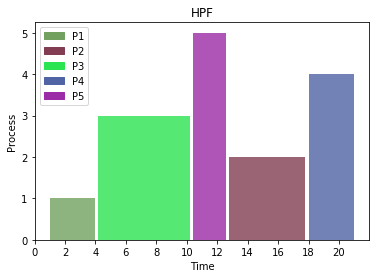

HPF


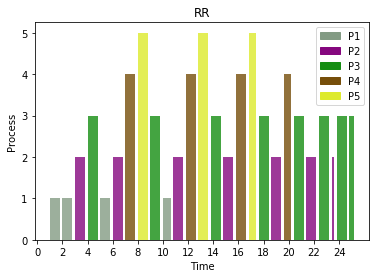

RR


In [12]:
filename = None
CS = None
Quantum = None
Algorithm = None


master = tk.Tk()

master.title('OS Scheduler')

v = tk.IntVar()


def get_input():
    fileName = e2.get()
    CS = e3.get()
    Quantum = e4.get()
    Algorithm = v.get()
    Processes = ReadFile(fileName)
    #print(fileName,CS,Quantum,Algorithm)
    #print(v.get())
    if (Algorithm== 1):
        HPF(Processes,float(CS))
    elif(Algorithm==2):
        FCFS(Processes,float(CS))
    elif(Algorithm==3):
        RR(Processes,float(CS),float(Quantum))
    elif(Algorithm==4):
        SRTF(Processes,float(CS))
    
    
def generate():
    infile = str(e1.get())
    outfile = str(e2.get())
    generateInput(infile,outfile)
    return

tk.Label(master, text= "Processes Generation").grid(row =0 )
tk.Label(master, text="Input File Name").grid(row=1)
tk.Label(master, text="Context Switching Time").grid(row=2)
tk.Label(master, text="Quantum").grid(row=3)
tk.Label(master, text="Choose an Algorithm : ").grid(row=4)


e1 = tk.Entry(master)
e2 = tk.Entry(master)
e3 = tk.Entry(master)
e4 = tk.Entry(master)

e1.grid(row=0, column=1)
e2.grid(row=1, column=1)
e3.grid(row=2, column=1)
e4.grid(row=3, column=1)


tk.Radiobutton(master, 
              text="Highest Priority First.", 
              variable=v, 
              value=1).grid(row = 5)
tk.Radiobutton(master, 
              text="First Come First Served.",
              variable=v, 
              value=2).grid(row = 6)
tk.Radiobutton(master, 
              text="Round Robin.",
              variable=v, 
              value=3).grid(row = 7)
tk.Radiobutton(master, 
              text="Shortest Remaining Time First.",
              variable=v, 
              value=4).grid(row = 8)

tk.Button(master, text='Generate',command=generate).grid(row=0, column=3)
tk.Button(master, text='Start',command=get_input,height = 2, width = 10).grid(row=6, column=1)


master.mainloop()